<a href="https://colab.research.google.com/github/samirasousza/RNA-2025.2-PP1.2/blob/main/rna_2025_2_pp1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade Avaliativa 1.2 - _Churn Prediction_

- Redes Neurais Artificiais 2025.2
- Profa. Elloá B. Guedes (ebgcosta@uea.edu.br)
- http://github.com/elloa

### Equipe

- Carla Lapa (github.com/integrante1)
- Nezi Pimentel (github.com/nezi404)
- Samira Souza (github.com/samirasousza)
- Vitória (github.com/integrante4)

### Apresentação

A previsão de evasão de clientes (_Churn Prediction_) é um problema tipicamente abordado pela Ciência de Dados com o uso de modelos de _Machine Learning_ para identificar clientes com alta probabilidade de descontinuar o uso de um serviço ou produto. Possui extrema importância para o domínio de negócios, especialmente para empresas com modelos de receita baseados em assinatura (SaaS, telecomunicações, serviços de streaming) ou que dependem da fidelidade do cliente, especialmente por:

1. **Impacto na Receita e Lucratividade.** O custo de adquirir um novo cliente é, em geral, significativamente maior do que o custo de reter um cliente existente. A evasão de clientes (churn) representa uma perda direta de receita recorrente. Ao prever quais clientes estão em risco, as empresas podem intervir com estratégias de retenção direcionadas, como ofertas especiais ou suporte aprimorado, minimizando essa perda financeira. A retenção de clientes não só protege a receita atual, mas também contribui para o aumento do _Lifetime Value_ do cliente, que é a receita total que um cliente gera ao longo de sua relação com a empresa;
2. **Otimização de Recursos e Estratégias.** Sem um modelo de previsão, as empresas tendem a adotar estratégias de retenção de forma genérica, aplicando os mesmos esforços a todos os clientes, independentemente do risco de evasão. Isso leva a um desperdício de recursos;
3. **Entendimento do Comportamento do Cliente.** A construção de um modelo de previsão de churn exige a análise aprofundada dos dados de comportamento do cliente. Esse processo revela insights valiosos sobre o que leva os clientes a ficarem ou a saírem, o que não apenas ajuda a reter clientes, mas também auxilia o desenvolvimento de produtos, a melhoria do serviço e a criação de estratégias de marketing mais eficazes para atrair clientes com um perfil de maior lealdade.

### Contexto do Problema

O termo _Telco_ se refere a _telecommunications industry_. Este domínio é particularmente relevante para a análise de churn devido ao seu alto nível de competição e saturação. Os clientes neste setor — seja para serviços de telefonia móvel, internet ou TV a cabo — têm uma vasta gama de provedores à sua escolha, o que torna relativamente fácil para eles migrarem caso estejam insatisfeitos ou encontrem uma oferta melhor.

### Base de Dados

Base de dados original: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [449]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Parte 1 - Análise e Exploração de Dados

### Abertura do Dataset
Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos. Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [450]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para cada uma das respostas elencadas

In [451]:
data = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Quantos exemplos há no dataset?

In [452]:
data.shape

(7043, 21)

#### Dados Faltantes

- Elimine todas as entradas em que há dados faltantes
- Qual o decréscimo percentual no tamanho do dataset?

In [453]:
df = data.dropna(how="any")
df.shape

(7043, 21)

#### Dados Duplicados

- Verifique se há clientes duplicados (mesmo id é repetido)
- Em caso afirmativo, elimine as duplicatas, favorecendo as entradas mais recentes

In [454]:
df.drop_duplicates(subset="customerID")
df.shape

(7043, 21)

#### Quais os atributos existentes no dataset e seu tipo?

- Exemplos de tipos de dados são categóricos (nominal ou ordinal), numéricos (discreto ou contínuo), textual ou estampa de tempo. Faça uma análise e agrupe por categoria na sua resposta. Observe que analisar os tipos das variáveis não é suficiente.

In [455]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


#### Qual cliente paga o maior valor de assinatura mensal e que não faz streaming de filmes?

- Apresente o valor pago mensalmente e os demais atributos desse cliente

In [456]:
df[df["StreamingMovies"] == "No"].max()["MonthlyCharges"]

np.float64(106.75)

In [457]:
df[df["StreamingMovies"] == "No"].max()

,0
customerID,9992-UJOEL
gender,Male
SeniorCitizen,1
Partner,Yes
Dependents,Yes
tenure,72
PhoneService,Yes
MultipleLines,Yes
InternetService,Fiber optic
OnlineSecurity,Yes


#### Histograma do tempo de permanência

O histograma é um gráfico que mostra as frequências de uma determinada informação. No nosso caso, vamos construir histogramas que mostram o tempo de permanência no serviço (tenure). Vamos agrupar os valores em bins, cujo número deve ser definido pela Regra de Sturges.

- Plote dois histogramas, um para os clientes que evadiram do serviço e outro para os que continuaram sua assinatura
- Rotule os eixos e utilize boas práticas de visualização da informação
- Faça a seguinte análise: as distribuições são diferentes?

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


In [458]:
tenure_churn = data[data["Churn"] == "Yes"]["tenure"] # evadidos
tenure_active = data[data["Churn"] == "No"]["tenure"] # não evadidos

# Calcular o número de bins pela Regra de Sturges
n_churn = len(tenure_churn)
n_active = len(tenure_active)

k_churn = int (np.ceil(1 + 3.322 * np.log10(n_churn)))
k_active = int (np.ceil(1 + 3.322 * np.log10(n_active)))

bins = max(k_churn, k_active) #usa o maior

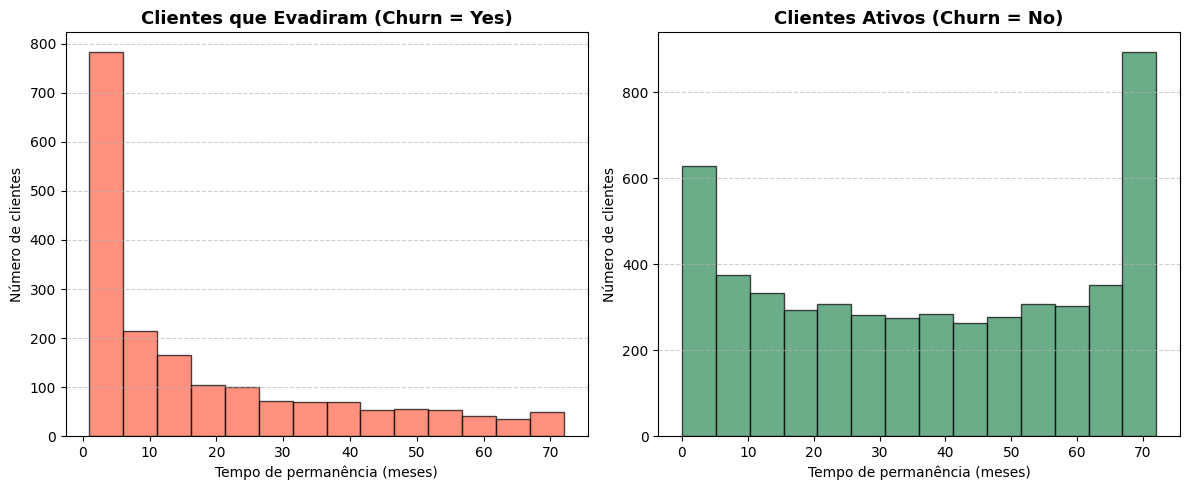

In [459]:
plt.figure(figsize=(12, 5))

# Histograma - evadidos
plt.subplot(1, 2, 1)
plt.hist(tenure_churn, bins=bins, color="tomato", edgecolor="black", alpha=0.7)
plt.title("Clientes que Evadiram (Churn = Yes)", fontsize=13, fontweight="bold")
plt.xlabel("Tempo de permanência (meses)")
plt.ylabel("Número de clientes")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Histograma - não evadidos
plt.subplot(1, 2, 2)
plt.hist(tenure_active, bins=bins, color="seagreen", edgecolor="black", alpha=0.7)
plt.title("Clientes Ativos (Churn = No)", fontsize=13, fontweight="bold")
plt.xlabel("Tempo de permanência (meses)")
plt.ylabel("Número de clientes")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

## Análise do histograma:

* Clientes que evadiram (Churn = Yes): maioria cancelou logo nos primeiros meses de contrato (tenure baixo).

* Clientes ativos (Churn = No): mais distribuídos, mas com grande concentração em quem já está há muito tempo no serviço.

* Conclusão: as distribuições são diferentes; a evasão ocorre principalmente no início, enquanto a fidelização se fortalece com o tempo de permanência.



#### Boxplot das Cobranças Mensais

Como é a distribuição das cobranças mensais? O gráfico boxplot pode nos ajudar nesta questão.

O boxplot ilustra informações importantes:
- Mediana
- Limite inferior (menor valor)
- Limite superior (maior valor)
- Q1 (primeiro quartil, 25% dos dados)
- Q3 (terceiro quartil, 75% dos dados)
- Outliers (se houver)

A distribuição dos exemplos no dataset é simétrica no tocante ao atributo em questão? Elabore um parágrafo que justifique as conclusões obtidas a partir da análise do boxplot.

Documentação completa disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2b528697c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2b528680b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2b527b6540>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2b53405850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2b531e9610>],
 'means': []}

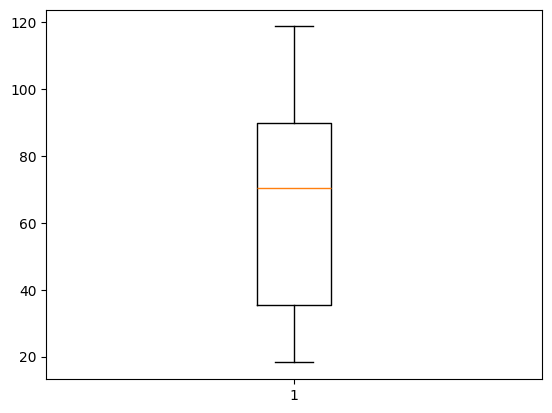

In [460]:
plt.boxplot(x='MonthlyCharges', data=df)

## Análise do gráfico:

* A distribuição dos exemplos no dataset é não é simétrica no tocante ao atributo em questão, pois os valores de seu limete inferior e superior variam, respectivamente, entre aproximadamente 20 e 100

#### Taxa de Churn

- Qual a taxa de churn para cada perfil de tipo de pagamento mensal? Há diferenças?

In [461]:

churn_rate_general = (df[df["Churn"] == "Yes"].shape[0]/df[df["tenure"] > 0].shape[0]) * 100
churn_rate_general

26.578498293515356

In [462]:
churn_rate_payment = (
    df.groupby("PaymentMethod")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)  # percentual
    .reset_index(name="Churn Rate (%)")
)

print(churn_rate_payment)

               PaymentMethod  Churn Rate (%)
0  Bank transfer (automatic)       16.709845
1    Credit card (automatic)       15.243101
2           Electronic check       45.285412
3               Mailed check       19.106700


#### Avaliação de Hipóteses

Analise as seguintes hipóteses, elaborando gráficos e consulta aos dados para embasar suas justificativas:

- Hipótese 1: "Clientes que optaram por serviços como TechSupport (suporte técnico) têm uma probabilidade menor de churn."
- Hipótese 2: "A taxa de churn é significativamente maior para clientes com contratos de curto prazo em comparação com aqueles com contratos de longo prazo."
- Hipótese 3: "Clientes com múltiplos serviços, com dependentes e que fazem backup online possuem baixa probabilidade de trocar de prestadora"


Hipótese 1 — Taxa de churn por TechSupport:
           TechSupport  ChurnRate(%)
0                   No     41.635474
2                  Yes     15.166341
1  No internet service      7.404980


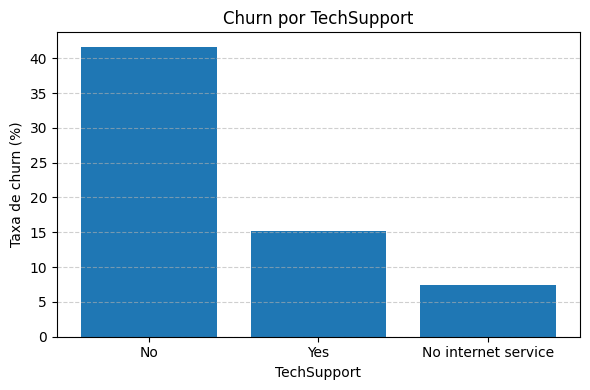

In [463]:
# Hipótese 1

h1_rates = (
        df.groupby("TechSupport")["Churn"]
        .apply(lambda s: (s == "Yes").mean() * 100)
        .reset_index(name="ChurnRate(%)")
        .sort_values("ChurnRate(%)", ascending=False)
    )
print("\nHipótese 1 — Taxa de churn por TechSupport:")
print(h1_rates)

plt.figure(figsize=(6,4))
plt.bar(h1_rates["TechSupport"].astype(str), h1_rates["ChurnRate(%)"])
plt.ylabel("Taxa de churn (%)")
plt.xlabel("TechSupport")
plt.title("Churn por TechSupport")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Taxa de churn (%) por tipo de contrato
         Contract  ChurnRate(%)
0  Month-to-month     42.709677
1        One year     11.269518
2        Two year      2.831858


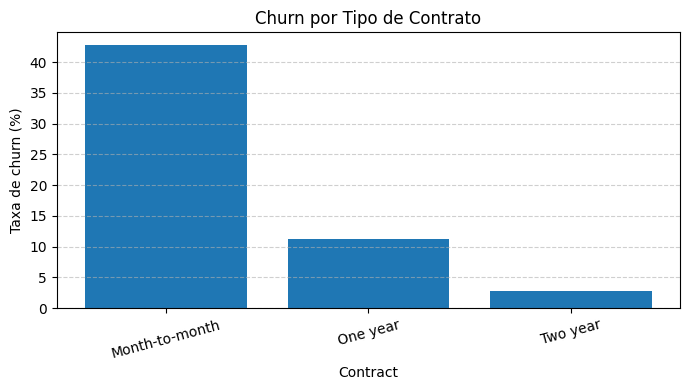

In [464]:
# Hipótese 2

h2_rates = (
    df.groupby("Contract")["Churn"]
    .apply(lambda s: (s == "Yes").mean() * 100)
    .reset_index(name="ChurnRate(%)")
    .sort_values("ChurnRate(%)", ascending=False)
)

print("Taxa de churn (%) por tipo de contrato")
print(h2_rates)

plt.figure(figsize=(7,4))
plt.bar(h2_rates["Contract"].astype(str), h2_rates["ChurnRate(%)"])
plt.ylabel("Taxa de churn (%)")
plt.xlabel("Contract")
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Taxa de churn (%) — Grupo H3 vs Outros
   grupo_h3  ChurnRate(%)
0  Grupo H3     12.436116
1    Outros     27.819083


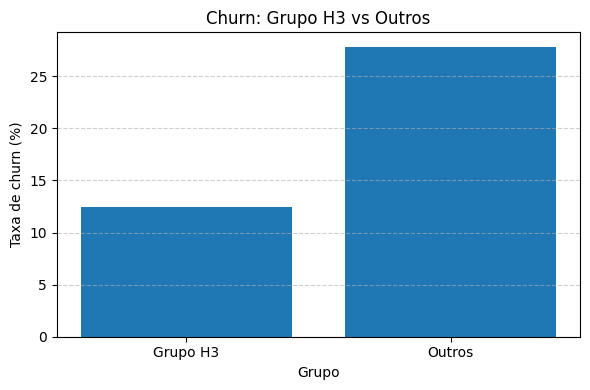

In [465]:
# Hipótese 3

cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MultipleLines"]
for c in cols + ["PhoneService","Dependents","InternetService"]:
    df[c] = df[c].astype(str)

internet_ativa = (df["InternetService"] != "No").astype(int)
phone_yes = (df["PhoneService"] == "Yes").astype(int)
addons = sum((df[c] == "Yes").astype(int) for c in cols)

df["grupo_h3"] = (
    (internet_ativa == 1) &
    (phone_yes == 1) &
    (addons >= 3) &
    (df["Dependents"] == "Yes") &
    (df["OnlineBackup"] == "Yes")
).map({True: "Grupo H3", False: "Outros"})

h3_rates = (
    df.groupby("grupo_h3")["Churn"]
    .apply(lambda s: (s == "Yes").mean() * 100)
    .reset_index(name="ChurnRate(%)")
)

print("Taxa de churn (%) — Grupo H3 vs Outros")
print(h3_rates)

plt.figure(figsize=(6,4))
plt.bar(h3_rates["grupo_h3"], h3_rates["ChurnRate(%)"])
plt.ylabel("Taxa de churn (%)")
plt.xlabel("Grupo")
plt.title("Churn: Grupo H3 vs Outros")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#### Perfil do Cliente de Risco

Crie uma série de 3 a 4 gráficos conectados que, juntos, respondam à seguinte pergunta:

_**Qual é o perfil do cliente com alta probabilidade de churn e o que mais o influencia a sair?**_

1. Visualização da Distribuição de Permanência (Tenure)  
- Gráfico: Histograma ou gráfico de densidade comparando o tempo de permanência (tenure) de clientes que saíram (Churn = Yes) com o de clientes que ficaram (Churn = No).
- Objetivo: Mostrar visualmente se o churn é mais comum entre clientes novos ou antigos.

2. Análise da Relação entre Tipo de Contrato e Evasão
- Gráfico: Gráfico de barras agrupadas ou empilhadas que mostre a taxa de churn para cada tipo de contrato (Monthly, One year, Two year).
- Objetivo: Demonstrar o impacto do tipo de contrato na decisão do cliente de sair.

3. Combinação de Variáveis: Preços e Serviços
- Gráfico: Gráfico de dispersão (scatter plot) ou um gráfico de box plot que combine duas variáveis-chave, como MonthlyCharges (cobranças mensais) e o tipo de serviço de internet (InternetService), segmentado pela variável Churn.
- Objetivo: Revelar se clientes que pagam mais por um tipo específico de serviço (ex: Fibra Óptica) têm uma taxa de churn diferente. Isso pode sugerir, por exemplo, que a insatisfação está ligada à qualidade de um serviço mais caro.


Escreva um breve parágrafo resumindo as descobertas. A resposta deve conectar as visualizações, respondendo à pergunta inicial sobre o perfil do cliente em risco de forma coesa e baseada nas evidências visuais.

/tmp/ipython-input-4223843551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn, x="Contract", y="ChurnRate(%)", palette="viridis")


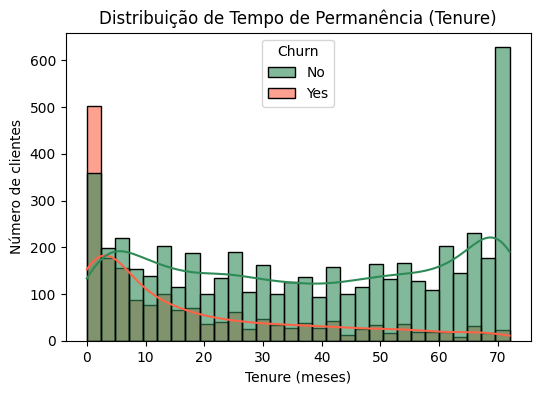

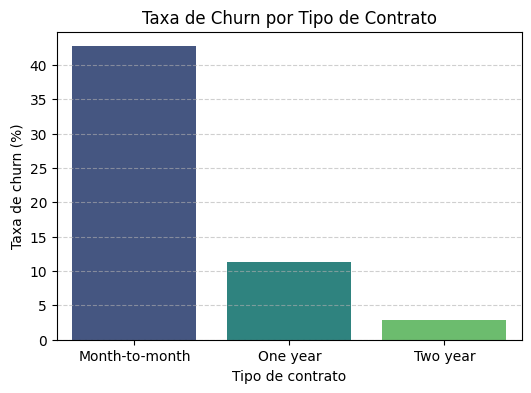

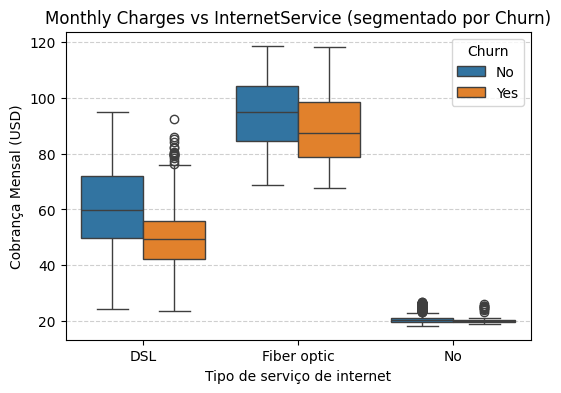

In [466]:
# 1. Distribuição de Permanência (Tenure)
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, palette={"Yes":"tomato","No":"seagreen"}, alpha=0.6)
plt.title("Distribuição de Tempo de Permanência (Tenure)")
plt.xlabel("Tenure (meses)")
plt.ylabel("Número de clientes")

# 2. Análise da Relação entre Tipo de Contrato e Evasão
contract_churn = (
    df.groupby("Contract")["Churn"]
    .apply(lambda s: (s=="Yes").mean()*100)
    .reset_index(name="ChurnRate(%)")
)

plt.figure(figsize=(6,4))
sns.barplot(data=contract_churn, x="Contract", y="ChurnRate(%)", palette="viridis")
plt.title("Taxa de Churn por Tipo de Contrato")
plt.ylabel("Taxa de churn (%)")
plt.xlabel("Tipo de contrato")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# 3. Combinação de Variáveis: Preços e Serviços
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="InternetService", y="MonthlyCharges", hue="Churn")
plt.title("Monthly Charges vs InternetService (segmentado por Churn)")
plt.ylabel("Cobrança Mensal (USD)")
plt.xlabel("Tipo de serviço de internet")
plt.legend(title="Churn")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


#### Gênero do Cliente

Conforme a documentação da base de dados, há dois valores possíveis para o gênero do cliente, são eles:  
    - M: Masculino  
    - F: Feminino  
    
Tal como dispostos, segundo strings, essas informações não ajudam modelos que lidam apenas com dados numéricos. É necessário efetuar uma codificação para representar tais valores. Assim, codifique a coluna gender conforme a abordagem One-Hot Encoding e elimine a coluna original do dataset.

Referências:
- https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [467]:
print(pd.get_dummies(df, columns=["gender"]))


      customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     7590-VHVEG              0     Yes         No       1           No   
1     5575-GNVDE              0      No         No      34          Yes   
2     3668-QPYBK              0      No         No       2          Yes   
3     7795-CFOCW              0      No         No      45           No   
4     9237-HQITU              0      No         No       2          Yes   
...          ...            ...     ...        ...     ...          ...   
7038  6840-RESVB              0     Yes        Yes      24          Yes   
7039  2234-XADUH              0     Yes        Yes      72          Yes   
7040  4801-JZAZL              0     Yes        Yes      11           No   
7041  8361-LTMKD              1     Yes         No       4          Yes   
7042  3186-AJIEK              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service  

#### Codificação dos Atributos

- Se o atributo tiver duas categorias, repita o processo de codificação conforme proposto anteriormente.
- Senão se o atributo tiver entre três e até cinco categorias, utilize Label Encoding.
- Em caso contrário, elimine a coluna em questão.

Referências:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [468]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df:
  tam = df[col].nunique()
  if tam == 2:
    df = pd.get_dummies(df, columns=[col])
  elif tam <= 5:
    le.fit(df[col])
    df[col] = le.transform(df[col])
  else:
    df = df.drop(col, axis=1)
df

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,...,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes,grupo_h3_Grupo H3,grupo_h3_Outros
0,1,0,0,2,0,0,0,0,0,2,...,True,False,True,False,False,True,True,False,False,True
1,0,0,2,0,2,0,0,0,1,3,...,True,False,False,True,True,False,True,False,False,True
2,0,0,2,2,0,0,0,0,0,3,...,True,False,False,True,False,True,False,True,False,True
3,1,0,2,0,2,2,0,0,1,0,...,True,False,True,False,True,False,True,False,False,True
4,0,1,0,0,0,0,0,0,0,2,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,0,2,0,2,2,2,2,1,3,...,False,True,False,True,False,True,True,False,False,True
7039,2,1,0,2,2,0,2,2,1,1,...,False,True,False,True,False,True,True,False,True,False
7040,1,0,2,0,0,0,0,0,0,2,...,False,True,True,False,False,True,True,False,False,True
7041,2,1,0,0,0,0,0,0,0,3,...,True,False,False,True,False,True,False,True,False,True


#### O dataset é balanceado?

- Considera-se que o dataset é balanceado se não houver mais de 10% de diferença no quantitativo das classes nele presentes. Faça a avaliação nesses termos. Elabore gráficos que justificam sua resposta.
- A partir da resposta considerada, apresente quatro métricas de desempenho a serem utilizadas na avaliação comparativa de modelos para esse problema

## Parte 2 - Tarefa de Aprendizado de Máquina

Abordaremos o problema da previsão de churn como uma tarefa de classificação binária.

#### Preparação dos dados para Validação Cruzada Holdout

- Vamos separar o atributo alvo (Age) dos atributores preditores.
  - Atributos preditores devem ser armazenados em uma variável denominada X  
  - Atributo alvo deve ser armazenado em uma variável denominada y
- Qual o tipo de entrada do modelo?
- Vamos efetuar uma partição do tipo holdout estratificada 70/30

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [492]:
X = df.drop(columns=['Churn_Yes', 'Churn_No'], axis=1)  # Atributos preditores # Atributos preditores
y = df["Churn_Yes"].copy()

In [486]:
y

,Churn_No,Churn_Yes
0,True,False
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
7038,True,False
7039,True,False
7040,True,False
7041,False,True


In [487]:
X

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,...,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,grupo_h3_Grupo H3,grupo_h3_Outros
0,1,0,0,2,0,0,0,0,0,2,...,False,True,True,False,True,False,False,True,False,True
1,0,0,2,0,2,0,0,0,1,3,...,True,False,True,False,False,True,True,False,False,True
2,0,0,2,2,0,0,0,0,0,3,...,True,False,True,False,False,True,False,True,False,True
3,1,0,2,0,2,2,0,0,1,0,...,True,False,True,False,True,False,True,False,False,True
4,0,1,0,0,0,0,0,0,0,2,...,True,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,0,2,0,2,2,2,2,1,3,...,False,True,False,True,False,True,False,True,False,True
7039,2,1,0,2,2,0,2,2,1,1,...,False,True,False,True,False,True,False,True,True,False
7040,1,0,2,0,0,0,0,0,0,2,...,False,True,False,True,True,False,False,True,False,True
7041,2,1,0,0,0,0,0,0,0,3,...,False,True,True,False,False,True,False,True,False,True


In [493]:
print(X.shape)
print(y.shape)

(7043, 24)
(7043,)


In [494]:
# Holdout estratificada 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dimensões
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (4930, 24)
Tamanho do conjunto de teste: (2113, 24)


#### Treinar um modelo de regressão logística para o problema

A Regressão Logística é uma técnica de Aprendizado de Máquina que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas.

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

Documentação completa disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [496]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)


In [500]:
X.shape

(7043, 24)

#### Obtendo previsões do modelo

1. Selecione um exemplo arbitrário da partição de teste
2. Forneça os atributos preditores e obtenha a previsão da churn
3. O modelo previu a saída corretamente?

In [512]:
print(clf.predict(X[:6]))
y[:6]

[False False False False  True  True]


,Churn_Yes
0,False
1,False
2,True
3,False
4,True
5,True


In [520]:
X_pred = clf.predict(X)
X_pred

array([False, False, False, ..., False,  True, False])

In [528]:
right = 0
for correct in range(len(X_pred)):
  if X_pred[correct] == y[correct]:
    right += 1
print(right)

5478


X

#### Avalie o modelo perante o conjunto de testes

1. Obtenha as métricas elencadas para o conjunto de testes
  * Efetue a importação de tais métricas a partir do pacote sklearn.metrics
2. Elabore uma visualização da matriz de confusão normalizada para as previsões do conjunto de testes
3. O modelo é bom para o problema? Justifique sua afirmação.

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score

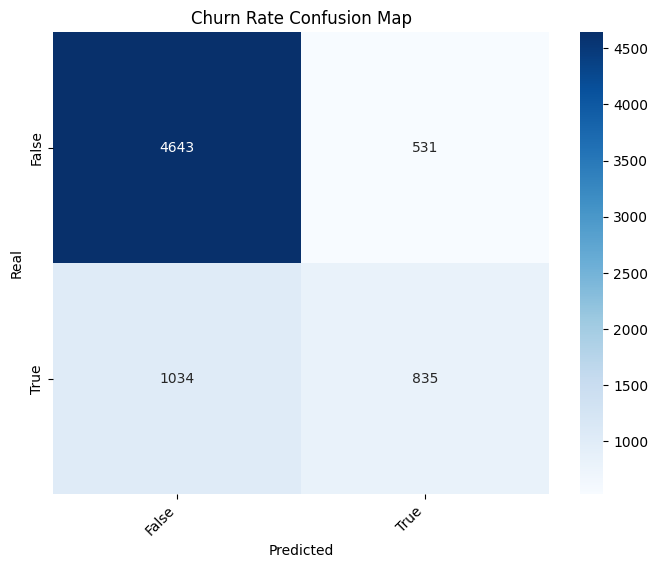

In [530]:
labels=["False", "True"]
cm = confusion_matrix(y, X_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Churn Rate Confusion Map")
plt.xticks(rotation=45, ha="right")
plt.show()

#### Treinar um modelo de K-Vizinhos Mais Próximos

É um algoritmo de Aprendizado de Máquina que baseia-se na média dos valores dos k vizinhos mais próximos a uma dada entrada para produzir uma estimativa para o atributo-alvo. É considerado "preguiçoso", mas muito mostra-se vantajoso por possuir um baixo custo computacional.

1. Efetue o treinamento do K-Vizinhos mais Próximos, considerando k = 5
2. Efetue o teste no modelo e obtenha as métricas de desempenho previamente indicadas.  

In [566]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)
y_pred_n = neigh.predict(X_test)

print(classification_report(y_test, y_pred_n))

              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1552
        True       0.67      0.59      0.63       561

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113



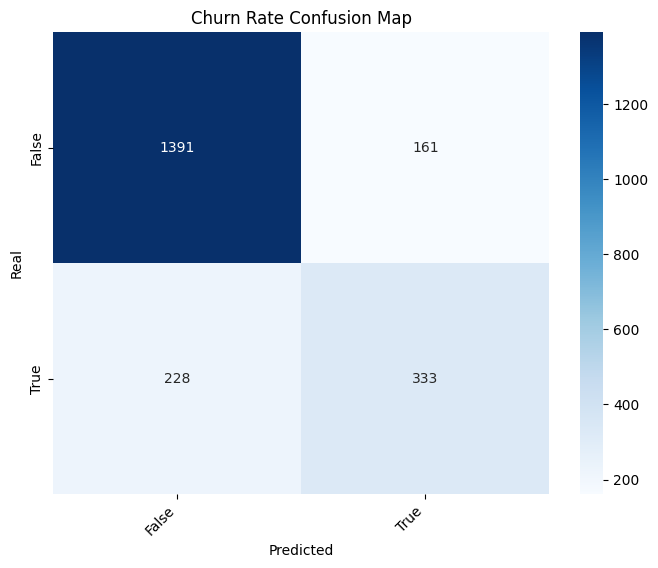

In [567]:
cm_n = confusion_matrix(y_test, y_pred_n)

plt.figure(figsize=(8,6))
sns.heatmap(cm_n, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Churn Rate Confusion Map")
plt.xticks(rotation=45, ha="right")
plt.show()

#### Treinar um modelo de Árvore de Decisão

É um modelo de aprendizado de máquina supervisionado, utilizado para problemas de classificação e regressão. Sua estrutura se assemelha a um fluxograma, em que cada nó interno representa um teste em uma atributo dado, cada ramo corresponde a um resultado desse teste, e cada nó folha a uma decisão final ou previsão. Destaca-se por sua interpretabilidade

1. Efetue o treinamento do Árvore de Decisão, utilizando o critério de entropia.
2. Efetue o teste no modelo e obtenha as métricas de desempenho previamente indicadas.  
3. Plote a árvore de decisão construída.

In [543]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


dt=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model2=dt.fit(X_train,y_train)
y_pred_t=model2.predict(X_test)

print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

       False       0.81      0.90      0.85      1552
        True       0.60      0.41      0.49       561

    accuracy                           0.77      2113
   macro avg       0.70      0.66      0.67      2113
weighted avg       0.75      0.77      0.76      2113



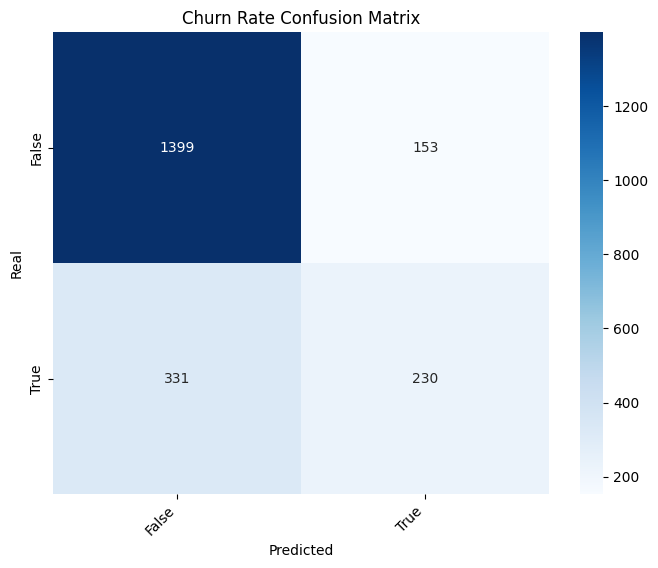

In [568]:
cm_t = confusion_matrix(y_test, y_pred_t)

plt.figure(figsize=(8,6))
sns.heatmap(cm_t, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Churn Rate Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.show()

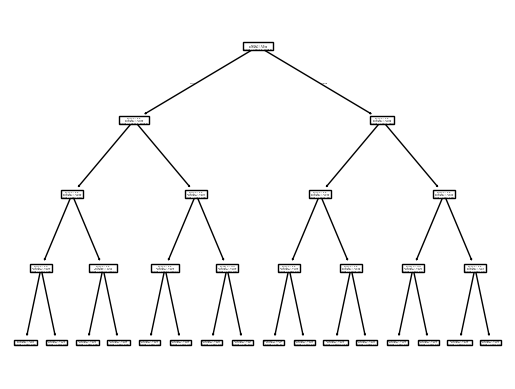

In [569]:
tree.plot_tree(model2)
plt.show()


#### Síntese dos Resultados

- Agrupe as matrizes de confusão obtidas lado a lado
- Crie uma tabela com todos os modelos e métricas (Pretty Table)

In [570]:
cm_t

array([[1399,  153],
       [ 331,  230]])

#### Argumente

- Qual o melhor modelo para o problema em questão?
- Qual o grau de dificuldade da tarefa de aprendizado proposta? Justifique a partir dos elementos e resultados obtidos nas células anteriores.